# Imports

## Libraries

In [ ]:
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
from tqdm.auto import tqdm # For progress bar

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Dataset

In [ ]:
# downloads the .csv file from google drive only if it's not already in directory
if os.path.isfile("/content/preschoolImplicitDataForCADES.csv") == False:
  !gdown --id 1975LU4ZR8dblLG_vvxz0vF3x9O58A3ou
  
df = pd.read_csv("/content/preschoolImplicitDataForCADES.csv")

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1975LU4ZR8dblLG_vvxz0vF3x9O58A3ou
To: /content/preschoolImplicitDataForCADES.csv
100% 975k/975k [00:00<00:00, 80.7MB/s]


# Helper Functions

In [ ]:
def missing_data(df):
    """
    Takes an existing dataframe as input and returns a new dataframe with the percentage and count of missing values for each column.
    """
    missing_count = df.isna().sum()  # Get the count of missing values for each column
    missing_pct = missing_count / len(df) * 100  # Calculate the percentage of missing values for each column
    missing_df = pd.concat([missing_count, missing_pct], axis=1, keys=['missing_count', 'missing_pct'])  # Combine the count and percentage into a new dataframe
    missing_df = missing_df[missing_df['missing_count'] > 0]  # Only include columns with missing values
    missing_df.index.name = 'column'  # Set the index name to 'column'
    missing_df = missing_df.sort_values(by='missing_pct', ascending=True)  # Sort by the percentage of missing values in descending order
    return missing_df

# Data Exploration

## Drop Unwanted Columns

In [ ]:
df = df.drop_duplicates()

## Missing Values Before

Before the 'Trial' Clean up

In [ ]:
missing_data(df)

,missing_count,missing_pct
column,,
HighOutlier,194,3.927921
phase,344,6.964973
block,344,6.964973
anticipationThreshold,934,18.910711
anticipated5,934,18.910711
side,934,18.910711
additiveAgeRTCorrection,934,18.910711
anticipated,934,18.910711
trial,1065,21.563069


## Drop Unwanted Rows

In [ ]:
df = df[df['trial'].notna() & df['duration'].notna()]

## Counting Rows

In [ ]:
df.shape

(3796, 45)

In [ ]:
# 52 subjects (26 TLD, 26 DLD)
# 48 implicit tests
# 24 explicit tests

num_participants = len(df['participant'].value_counts())
52*(48+24)

3744

## Missing Values After

In [ ]:
missing_data(df)

,missing_count,missing_pct
column,,
phase,33,0.869336
block,33,0.869336
changeTrial,52,1.369863
alternationTargetExpectation,102,2.687039
responseAlternation.corr,102,2.687039
SoundAndAlternationConvergence,103,2.713383
HighOutlier,193,5.084299
LowOutlier,1000,26.343519
RTwoOutlier,1193,31.427819


## Grouping

By Development, Participant ID, and Test Type

In [ ]:
# Participant IDs
print(f"\n\nThere are {len(df.value_counts(['participant'], dropna=False))} participants.\n\n")
pd.DataFrame(df.value_counts(['group','participant', 'phase'], sort=False, dropna=False))



There are 53 participants.




0
group participant phase               
DLD   P100        explicitTest      24
                  implicitTraining  48
      P103        explicitTest      24
                  implicitTraining  48
      P104        explicitTest      24
                  implicitTraining  48
      P105        explicitTest      24
                  implicitTraining  48
      P106        explicitTest      24
                  implicitTraining  48
      P107        explicitTest      24
                  implicitTraining  48
      P27         explicitTest      24
                  implicitTraining  48
      P62         explicitTest      24
                  implicitTraining  48
      P65         explicitTest      24
                  implicitTraining  48
      P67         explicitTest      24
                  implicitTraining  48
      P68         explicitTest      24
                  implicitTraining  48
      P70         explicitTest      24
                  implicitTraining  48
      P71         explicitTest      24
                  implicitTraining  48
      P72         explicitTest      24
                  implicitTraining  48
      P75         explicitTest      24
                  implicitTraining  48
      P78         explicitTest      24
                  implicitTraining  48
      P80         explicitTest      24
                  implicitTraining  48
      P83         explicitTest      24
                  implicitTraining  48
      P84         explicitTest      24
                  implicitTraining  48
      P86         explicitTest      24
                  implicitTraining  48
      P87         explicitTest      24
                  implicitTraining  48
      P90         explicitTest      24
                  implicitTraining  48
      P94         explicitTest      24
                  implicitTraining  48
      P95         explicitTest      24
                  implicitTraining  48
      P99         explicitTest      24
                  implicitTraining  48
      p98         explicitTest      24
                  implicitTraining  48
      participant phase             19
                  NaN               33
TLD   P108        explicitTest      24
                  implicitTraining  48
      P109        explicitTest      24
                  implicitTraining  48
      P110        explicitTest      24
                  implicitTraining  48
      P111        explicitTest      24
                  implicitTraining  48
      P113        explicitTest      24
                  implicitTraining  48
      P114        explicitTest      24
                  implicitTraining  48
      P30         explicitTest      24
                  implicitTraining  48
      P33         explicitTest      24
                  implicitTraining  48
      P37         explicitTest      24
                  implicitTraining  48
      P39         explicitTest      24
                  implicitTraining  48
      P41         explicitTest      24
                  implicitTraining  48
      P42         explicitTest      24
                  implicitTraining  48
      P44         explicitTest      24
                  implicitTraining  48
      P45         explicitTest      24
                  implicitTraining  48
      P46         explicitTest      24
                  implicitTraining  48
      P47         explicitTest      24
                  implicitTraining  48
      P50         explicitTest      24
                  implicitTraining  48
      P55         explicitTest      24
                  implicitTraining  48
      P60         explicitTest      24
                  implicitTraining  48
      P63         explicitTest      24
                  implicitTraining  48
      P64         explicitTest      24
                  implicitTraining  48
      P73         explicitTest      24
                  implicitTraining  48
      P74         explicitTest      24
                  implicitTraining  48
      P77         explicitTest      24
                  im

## Drop Unwanted Columns

## 4/18 Quesetion 1

Is a single participate evaluated in both duration and pitch?

In [ ]:
# Is a single participate evaluated in both duration and pitch?

## 4/18 Question 2

We have three variables: BlockOrigin (alternation pattern), duration, and pitch. For a given alternation pattern do we always have the same sound variation in either pitch or duration

In [ ]:
df[['blockOrig', 'duration', 'pitch']].drop_duplicates().sort_values(['blockOrig'])

,blockOrig,duration,pitch
18,1,0.3,1.07271948
19,1,0.66,2.304593711
20,1,0.78,2.715218455
21,1,0.54,1.893968967
22,1,0.42,1.483344223
23,1,0.9,3.125843199
48,2,0.66,2.304593711
47,2,0.9,3.125843199
46,2,0.3,1.07271948
45,2,0.54,1.893968967


In [ ]:
df[['blockOrig', 'duration', 'pitch']].drop_duplicates().sort_values(['duration', 'pitch', 'blockOrig'])

,blockOrig,duration,pitch
18,1,0.3,1.07271948
46,2,0.3,1.07271948
66,3,0.3,1.07271948
31,4,0.3,1.07271948
26,5,0.3,1.07271948
53,6,0.3,1.07271948
55,7,0.3,1.07271948
40,8,0.3,1.07271948
22,1,0.42,1.483344223
43,2,0.42,1.483344223


# Scatter Plot

In [ ]:
df[df['blockOrig'] == 'blockOrig']

,index,phase,block,Sound1_preAndPosttest,Sound2_preAndPosttest,category,side,changeTrial,alternationTargetExpectation,SoundAndAlternationConvergence,soundfileNum,duration,pitch,blockOrig,trial,discrimStim.thisTrialN,discrimStim.thisIndex,key_resp_14.keys,pretestCorr,pretestDistance,key_resp_14.rt,resp_1.keys,resp_1.corr,responseAlternation.corr,resp_1.rt,mean,SD,RTwoOutlier,LowOutlier,HighOutlier,anticipationThreshold,additiveAgeRTCorrection,ageCorrection5yrs,anticipated,anticipated5,key_resp_20.keys,key_resp_20.corr,categoryDecision,key_resp_20.rt,participant,group,sex,demographicInfo,soundDimension,trialOrder
95,230,phase,block,Sound1,Sound2,category,side,NaN,NaN,NaN,soundfileNum,duration_dur,pitch_pitch,blockOrig,trial,discrimStim.thisTrialN,discrimStim.thisIndex,key_resp_14.keys,0,NaN,key_resp_14.rt,resp_1.keys,resp_1.corr,NaN,resp_1.rt,2.530398,0.476513,NaN,resp_1.rt,NaN,1.383,0.66,0.58,0.0,0.0,key_resp_20.keys,key_resp_20.corr,0,key_resp_20.rt,participant,DLD,m,1655.0,version,list
284,460,phase,block,Sound1,Sound2,category,side,NaN,NaN,NaN,soundfileNum,duration_dur,pitch_pitch,blockOrig,trial,discrimStim.thisTrialN,discrimStim.thisIndex,key_resp_14.keys,0,NaN,key_resp_14.rt,resp_1.keys,resp_1.corr,NaN,resp_1.rt,2.530398,0.476513,NaN,resp_1.rt,NaN,1.383,0.66,0.58,0.0,0.0,key_resp_20.keys,key_resp_20.corr,0,key_resp_20.rt,participant,DLD,m,1655.0,version,list
285,575,phase,block,Sound1,Sound2,category,side,NaN,NaN,NaN,soundfileNum,duration_dur,pitch_pitch,blockOrig,trial,discrimStim.thisTrialN,discrimStim.thisIndex,key_resp_14.keys,0,NaN,key_resp_14.rt,resp_1.keys,resp_1.corr,NaN,resp_1.rt,2.530398,0.476513,NaN,resp_1.rt,NaN,1.383,0.66,0.58,0.0,0.0,key_resp_20.keys,key_resp_20.corr,0,key_resp_20.rt,participant,DLD,m,1655.0,version,list
381,805,phase,block,Sound1,Sound2,category,side,NaN,NaN,NaN,soundfileNum,duration_dur,pitch_pitch,blockOrig,trial,discrimStim.thisTrialN,discrimStim.thisIndex,key_resp_14.keys,0,NaN,key_resp_14.rt,resp_1.keys,resp_1.corr,NaN,resp_1.rt,2.530398,0.476513,NaN,resp_1.rt,NaN,1.383,0.66,0.58,0.0,0.0,key_resp_20.keys,key_resp_20.corr,0,key_resp_20.rt,participant,DLD,m,1655.0,version,list
477,1035,phase,block,Sound1,Sound2,category,side,NaN,NaN,NaN,soundfileNum,duration_dur,pitch_pitch,blockOrig,trial,discrimStim.thisTrialN,discrimStim.thisIndex,key_resp_14.keys,0,NaN,key_resp_14.rt,resp_1.keys,resp_1.corr,NaN,resp_1.rt,2.530398,0.476513,NaN,resp_1.rt,NaN,1.383,0.66,0.58,0.0,0.0,key_resp_20.keys,key_resp_20.corr,0,key_resp_20.rt,participant,DLD,m,1655.0,version,list
478,1150,phase,block,Sound1,Sound2,category,side,NaN,#REF!,#REF!,soundfileNum,duration_dur,pitch_pitch,blockOrig,trial,discrimStim.thisTrialN,discrimStim.thisIndex,key_resp_14.keys,0,NaN,key_resp_14.rt,resp_1.keys,resp_1.corr,#REF!,resp_1.rt,2.530398,0.476513,NaN,resp_1.rt,NaN,1.383,0.66,0.58,0.0,0.0,key_resp_20.keys,key_resp_20.corr,0,key_resp_20.rt,participant,DLD,m,1655.0,version,list
573,1265,phase,block,Sound1,Sound2,category,side,NaN,NaN,NaN,soundfileNum,duration_dur,pitch_pitch,blockOrig,trial,discrimStim.thisTrialN,discrimStim.thisIndex,key_resp_14.keys,0,NaN,key_resp_14.rt,resp_1.keys,resp_1.corr,NaN,resp_1.rt,2.530398,0.476513,NaN,resp_1.rt,NaN,1.383,0.66,0.58,0.0,0.0,key_resp_20.keys,key_resp_20.corr,0,key_resp_20.rt,participant,DLD,m,1655.0,version,list
859,1725,phase,block,Sound1,Sound2,category,side,NaN,NaN,NaN,soundfileNum,duration_dur,pitch_pitch,blockOrig,trial,discrimStim.thisTrialN,discrimStim.thisIndex,key_resp_14.keys,0,NaN,key_resp_14.rt,resp_1.keys,resp_1.corr,NaN,resp_1.rt,2.530398,0.476513,NaN,resp_1.rt,NaN,1.383,0.66,0.58,0.0,0.0,key_resp_20.keys,key_resp_20.corr,0,key_resp_20.rt,participant,DLD,m,1655.0,version,list
1050,2070,phase,block,Sound1,Sound2,category,side,NaN,NaN,NaN,soundfileNum,duration_dur,pitch_pitch,blockOrig,trial,discrimStim.thisTrialN,discrimStim.thisIndex,key_resp_14.keys,0,NaN,key_resp_14.rt,resp_1.keys,resp_1.corr,NaN,resp_1.rt,2.530398,0.476513,NaN,resp_1.rt,NaN,1.383,0.66,0.58,0.0,0.0,key

# Examining Columns

In [ ]:
df = df.reset_index(drop=True)
df = df.drop([
    'index',
    'Sound1_preAndPosttest', 'Sound2_preAndPosttest',
    'category', 
    'discrimStim.thisTrialN',	
    'discrimStim.thisIndex',
    'key_resp_14.keys',
    'pretestCorr',
    'pretestDistance',
    'key_resp_14.rt',
], axis=1)

In [ ]:
df.head(10)

,phase,block,side,changeTrial,alternationTargetExpectation,SoundAndAlternationConvergence,soundfileNum,duration,pitch,blockOrig,trial,resp_1.keys,resp_1.corr,responseAlternation.corr,resp_1.rt,mean,SD,RTwoOutlier,LowOutlier,HighOutlier,anticipationThreshold,additiveAgeRTCorrection,ageCorrection5yrs,anticipated,anticipated5,key_resp_20.keys,key_resp_20.corr,categoryDecision,key_resp_20.rt,participant,group,sex,demographicInfo,soundDimension,trialOrder
0,implicitTraining,1,left,0.0,NaN,NaN,1,0.3,1.07271948,1,1,right,0,NaN,2.188951969,2.634109,0.530028,2.188952,2.188951969,2.188952,1.800,0.74,0.58,1.0,1.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
1,implicitTraining,1,right,1.0,right,converge,4,0.66,2.304593711,1,2,left,0,0,2.044434071,2.634109,0.530028,2.044434,2.044434071,2.044434,1.383,0.74,0.58,1.0,0.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
2,implicitTraining,1,right,0.0,left,conflict,5,0.78,2.715218455,1,3,right,1,0,1.868333101,2.634109,0.530028,1.868333,1.868333101,1.868333,1.383,0.74,0.58,1.0,1.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
3,implicitTraining,1,left,1.0,left,converge,3,0.54,1.893968967,1,4,left,1,1,2.811274052,2.634109,0.530028,2.811274,2.811274052,2.811274,1.800,0.74,0.58,0.0,0.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
4,implicitTraining,1,left,0.0,right,conflict,2,0.42,1.483344223,1,5,left,1,0,3.06602788,2.634109,0.530028,3.066028,3.06602788,3.066028,1.800,0.74,0.58,0.0,0.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
5,implicitTraining,1,right,1.0,right,converge,6,0.9,3.125843199,1,6,right,1,1,5.176866055,2.634109,0.530028,NaN,5.176866055,NaN,1.383,0.74,0.58,0.0,0.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
6,implicitTraining,1,right,0.0,left,conflict,5,0.78,2.715218455,5,7,right,1,0,3.119224072,2.634109,0.530028,3.119224,3.119224072,3.119224,1.383,0.74,0.58,0.0,0.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
7,implicitTraining,1,left,1.0,left,converge,2,0.42,1.483344223,5,8,left,1,1,2.607019901,2.634109,0.530028,2.607020,2.607019901,2.607020,1.800,0.74,0.58,0.0,0.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
8,implicitTraining,1,left,0.0,right,conflict,1,0.3,1.07271948,5,9,left,1,0,2.786305189,2.634109,0.530028,2.786305,2.786305189,2.786305,1.800,0.74,0.58,0.0,0.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
9,implicitTraining,1,right,1.0,right,converge,4,0.66,2.304593711,5,10,right,1,1,2.378491879,2.634109,0.530028,2.378492,2.378491879,2.378492,1.383,0.74,0.58,0.0,0.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1


In [ ]:
df.to_csv("preschool_cleaned.csv", index=False)

In [ ]:
missing_data(df)

,missing_count,missing_pct
column,,
phase,33,0.869336
block,33,0.869336
changeTrial,52,1.369863
alternationTargetExpectation,102,2.687039
responseAlternation.corr,102,2.687039
SoundAndAlternationConvergence,103,2.713383
HighOutlier,193,5.084299
LowOutlier,1000,26.343519
RTwoOutlier,1193,31.427819


In [ ]:
list(df.columns)

['phase',
 'block',
 'side',
 'changeTrial',
 'alternationTargetExpectation',
 'SoundAndAlternationConvergence',
 'soundfileNum',
 'duration',
 'pitch',
 'blockOrig',
 'trial',
 'resp_1.keys',
 'resp_1.corr',
 'responseAlternation.corr',
 'resp_1.rt',
 'mean',
 'SD',
 'RTwoOutlier',
 'LowOutlier',
 'HighOutlier',
 'anticipationThreshold',
 'additiveAgeRTCorrection',
 'ageCorrection5yrs',
 'anticipated',
 'anticipated5',
 'key_resp_20.keys',
 'key_resp_20.corr',
 'categoryDecision',
 'key_resp_20.rt',
 'participant',
 'group',
 'sex',
 'demographicInfo',
 'soundDimension',
 'trialOrder']

# Plottin' Shit

In [ ]:
p_df = df[df['phase']=='implicitTraining']
p_df = p_df[['participant','trial','resp_1.rt', 'group']]
p_df['resp_1.rt'] = p_df['resp_1.rt'].astype(float)
p_df['trial'] = p_df['trial'].astype(int)
p_df.head(10)

,participant,trial,resp_1.rt,group
0,P27,1,2.188952,DLD
1,P27,2,2.044434,DLD
2,P27,3,1.868333,DLD
3,P27,4,2.811274,DLD
4,P27,5,3.066028,DLD
5,P27,6,5.176866,DLD
6,P27,7,3.119224,DLD
7,P27,8,2.607020,DLD
8,P27,9,2.786305,DLD
9,P27,10,2.378492,DLD


In [ ]:
"p_df = pd.DataFrame("+str(p_df.head(10).to_dict())+")"

"p_df = pd.DataFrame({'participant': {0: 'P27', 1: 'P27', 2: 'P27', 3: 'P27', 4: 'P27', 5: 'P27', 6: 'P27', 7: 'P27', 8: 'P27', 9: 'P27'}, 'trial': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10}, 'resp_1.rt': {0: 2.188951969, 1: 2.044434071, 2: 1.868333101, 3: 2.811274052, 4: 3.06602788, 5: 5.176866055, 6: 3.119224072, 7: 2.607019901, 8: 2.786305189, 9: 2.378491879}, 'group': {0: 'DLD', 1: 'DLD', 2: 'DLD', 3: 'DLD', 4: 'DLD', 5: 'DLD', 6: 'DLD', 7: 'DLD', 8: 'DLD', 9: 'DLD'}})"

In [ ]:
p_df.shape

(2496, 4)

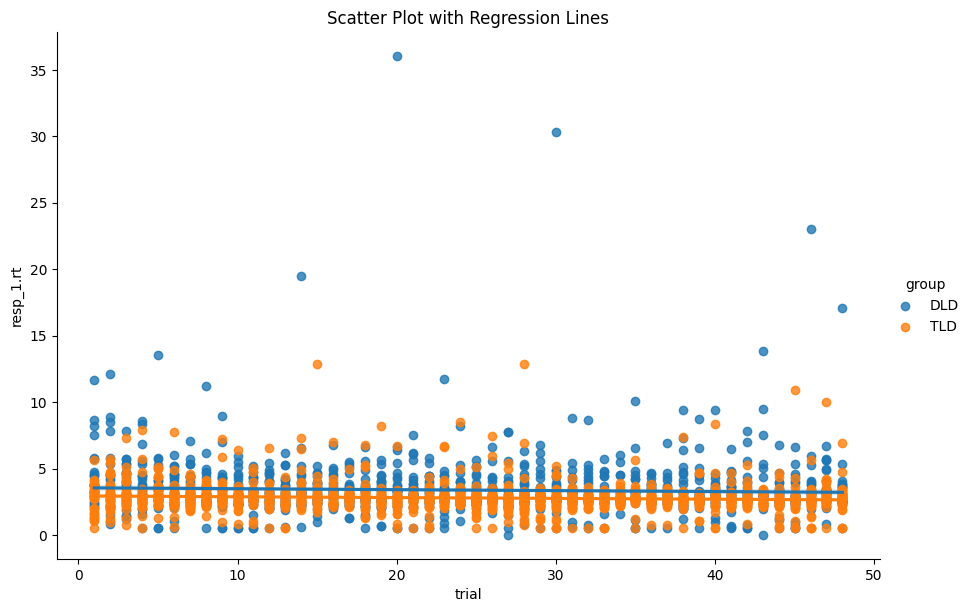

In [ ]:
import seaborn as sns

sns.lmplot(x='trial', y='resp_1.rt', hue='group', data=p_df, height=6, aspect=1.5)

# set plot title
plt.title('Scatter Plot with Regression Lines')

# show the plot
plt.show()


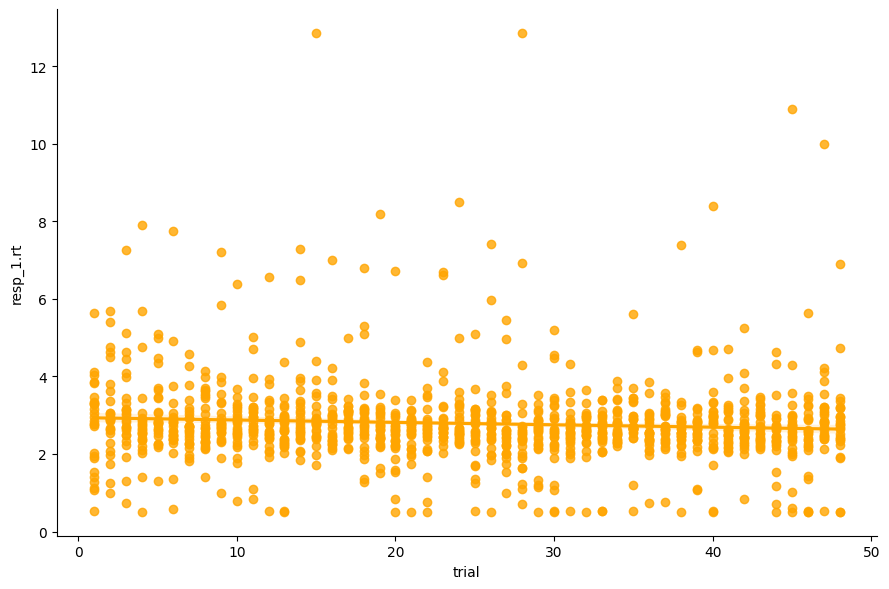

In [ ]:
tld_df = p_df[p_df['group']=="TLD"]
sns.lmplot(x='trial', y='resp_1.rt', data=tld_df, height=6, aspect=1.5, line_kws={'color': 'orange'}, scatter_kws={'color': 'orange'})

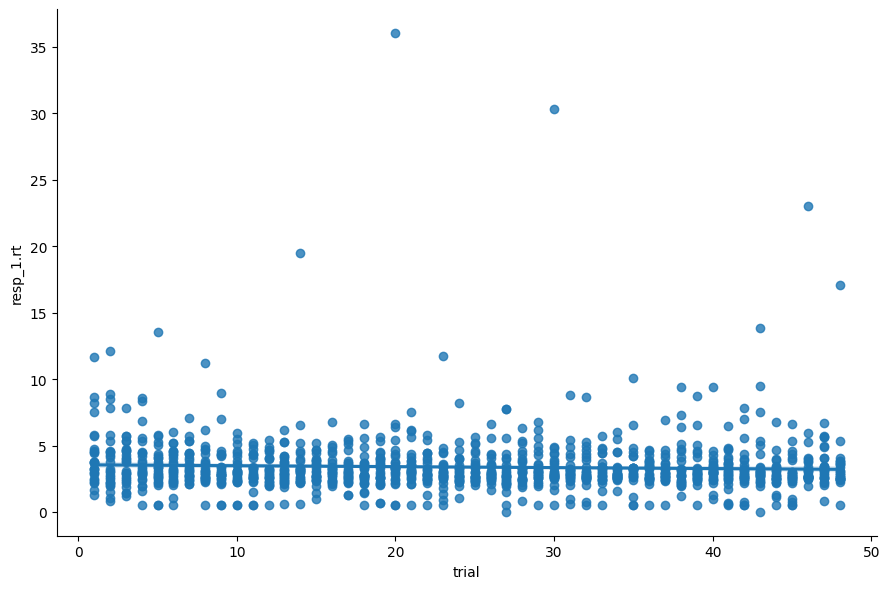

In [ ]:
tld_df = p_df[p_df['group']=="DLD"]
sns.lmplot(x='trial', y='resp_1.rt', data=tld_df, height=6, aspect=1.5)

In [ ]:
df.value_counts(['phase'])

phase           
implicitTraining    2496
explicitTest        1248
phase                 19
dtype: int64

In [ ]:
et_df = df[df['phase']=='explicitTest']
et_df = et_df[['participant','trial','key_resp_20.rt', 'group']]
et_df['key_resp_20.rt'] = et_df['key_resp_20.rt'].astype(float)
et_df['trial'] = et_df['trial'].astype(int)
et_df.head(10)

,participant,trial,key_resp_20.rt,group
48,P27,49,27.108993,DLD
49,P27,50,8.179810,DLD
50,P27,51,9.995642,DLD
51,P27,52,6.414720,DLD
52,P27,53,0.099004,DLD
53,P27,54,13.258880,DLD
54,P27,55,7.012847,DLD
55,P27,56,9.395216,DLD
56,P27,57,3.549455,DLD
57,P27,58,4.396857,DLD


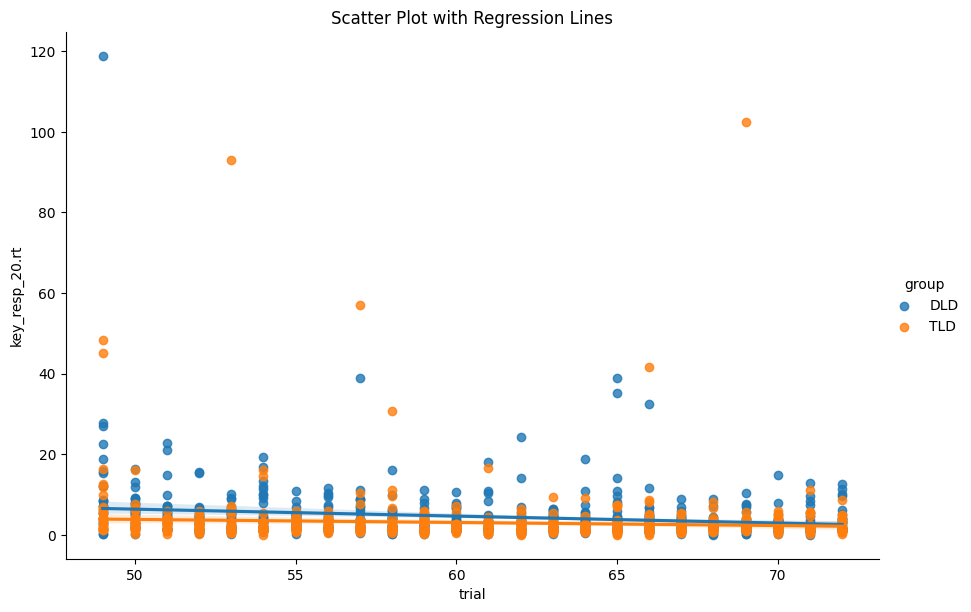

In [ ]:
sns.lmplot(x='trial', y='key_resp_20.rt', hue='group', data=et_df, height=6, aspect=1.5)

# set plot title
plt.title('Scatter Plot with Regression Lines')

# show the plot
plt.show()

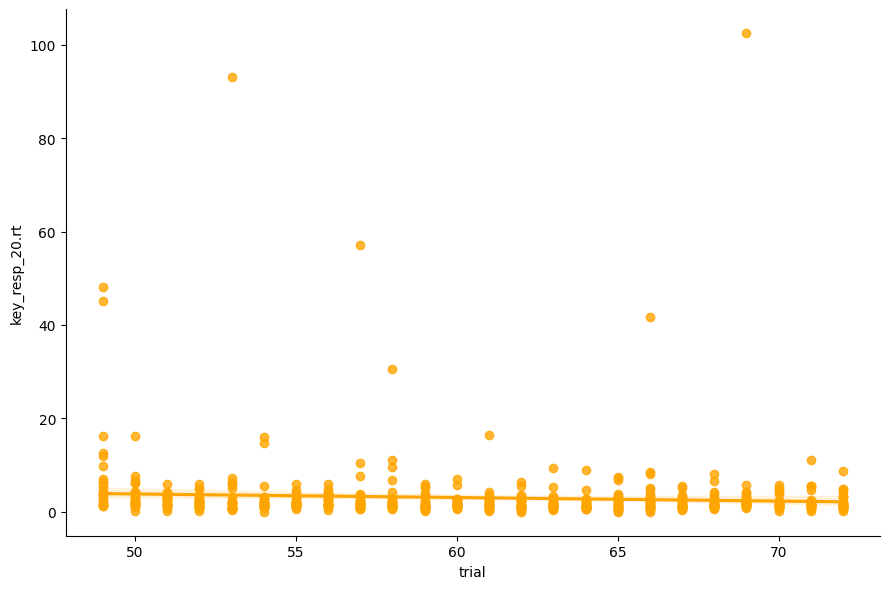

In [ ]:
etld_df = et_df[et_df['group']=="TLD"]
sns.lmplot(x='trial', y='key_resp_20.rt', data=etld_df, height=6, aspect=1.5, line_kws={'color': 'orange'}, scatter_kws={'color': 'orange'})

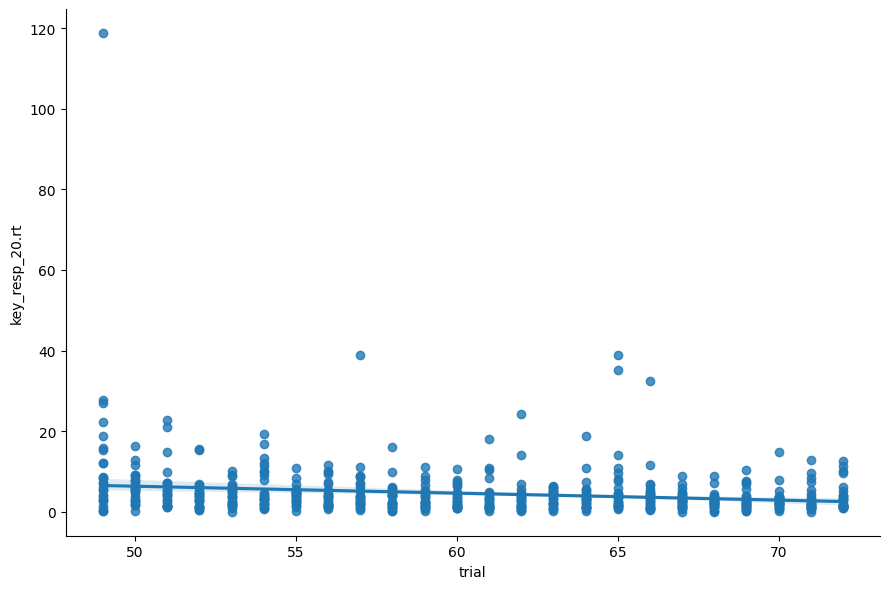

In [ ]:
etld_df = et_df[et_df['group']=="DLD"]
sns.lmplot(x='trial', y='key_resp_20.rt', data=etld_df, height=6, aspect=1.5)

In [ ]:
df[df['phase']=='explicitTest'].head(10)

,phase,block,side,changeTrial,alternationTargetExpectation,SoundAndAlternationConvergence,soundfileNum,duration,pitch,blockOrig,trial,resp_1.keys,resp_1.corr,responseAlternation.corr,resp_1.rt,mean,SD,RTwoOutlier,LowOutlier,HighOutlier,anticipationThreshold,additiveAgeRTCorrection,ageCorrection5yrs,anticipated,anticipated5,key_resp_20.keys,key_resp_20.corr,categoryDecision,key_resp_20.rt,participant,group,sex,demographicInfo,soundDimension,trialOrder
48,explicitTest,3,left,0.0,#REF!,#REF!,1,0.3,1.07271948,1,49,NaN,NaN,#REF!,NaN,2.634109,0.530028,NaN,NaN,0.0,1.800,0.74,0.58,0.0,0.0,p,0,NaN,27.10899305,P27,DLD,m,1547.0,pitch,1
49,explicitTest,3,right,1.0,right,converge,4,0.66,2.304593711,1,50,NaN,NaN,0,NaN,2.634109,0.530028,NaN,NaN,0.0,1.383,0.74,0.58,0.0,0.0,left,0,0,8.179809809,P27,DLD,m,1547.0,pitch,1
50,explicitTest,3,right,0.0,left,conflict,5,0.78,2.715218455,1,51,NaN,NaN,1,NaN,2.634109,0.530028,NaN,NaN,0.0,1.383,0.74,0.58,0.0,0.0,left,0,0,9.995641947,P27,DLD,m,1547.0,pitch,1
51,explicitTest,3,left,1.0,left,converge,3,0.54,1.893968967,1,52,NaN,NaN,0,NaN,2.634109,0.530028,NaN,NaN,0.0,1.800,0.74,0.58,0.0,0.0,right,0,1,6.414720058,P27,DLD,m,1547.0,pitch,1
52,explicitTest,3,left,0.0,right,conflict,2,0.42,1.483344223,1,53,NaN,NaN,0,NaN,2.634109,0.530028,NaN,NaN,0.0,1.800,0.74,0.58,0.0,0.0,left,1,0,0.09900403023,P27,DLD,m,1547.0,pitch,1
53,explicitTest,3,right,1.0,right,converge,6,0.9,3.125843199,1,54,NaN,NaN,1,NaN,2.634109,0.530028,NaN,NaN,0.0,1.383,0.74,0.58,0.0,0.0,right,1,1,13.2588799,P27,DLD,m,1547.0,pitch,1
54,explicitTest,3,right,0.0,left,conflict,5,0.78,2.715218455,5,55,NaN,NaN,1,NaN,2.634109,0.530028,NaN,NaN,0.0,1.383,0.74,0.58,0.0,0.0,left,0,0,7.012847185,P27,DLD,m,1547.0,pitch,1
55,explicitTest,3,left,1.0,left,converge,2,0.42,1.483344223,5,56,NaN,NaN,1,NaN,2.634109,0.530028,NaN,NaN,0.0,1.800,0.74,0.58,0.0,0.0,left,1,0,9.395215988,P27,DLD,m,1547.0,pitch,1
56,explicitTest,3,left,0.0,right,conflict,1,0.3,1.07271948,5,57,NaN,NaN,1,NaN,2.634109,0.530028,NaN,NaN,0.0,1.800,0.74,0.58,0.0,0.0,right,0,1,3.549454927,P27,DLD,m,1547.0,pitch,1
57,explicitTest,3,right,1.0,right,converge,4,0.66,2.304593711,5,58,NaN,NaN,1,NaN,2.634109,0.530028,NaN,NaN,0.0,1.383,0.74,0.58,0.0,0.0,right,1,1,4.396857023,P27,DLD,m,1547.0,pitch,1


In [ ]:
df[df['phase']=='implicitTraining'].head(10)

,phase,block,side,changeTrial,alternationTargetExpectation,SoundAndAlternationConvergence,soundfileNum,duration,pitch,blockOrig,trial,resp_1.keys,resp_1.corr,responseAlternation.corr,resp_1.rt,mean,SD,RTwoOutlier,LowOutlier,HighOutlier,anticipationThreshold,additiveAgeRTCorrection,ageCorrection5yrs,anticipated,anticipated5,key_resp_20.keys,key_resp_20.corr,categoryDecision,key_resp_20.rt,participant,group,sex,demographicInfo,soundDimension,trialOrder
0,implicitTraining,1,left,0.0,NaN,NaN,1,0.3,1.07271948,1,1,right,0,NaN,2.188951969,2.634109,0.530028,2.188952,2.188951969,2.188952,1.800,0.74,0.58,1.0,1.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
1,implicitTraining,1,right,1.0,right,converge,4,0.66,2.304593711,1,2,left,0,0,2.044434071,2.634109,0.530028,2.044434,2.044434071,2.044434,1.383,0.74,0.58,1.0,0.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
2,implicitTraining,1,right,0.0,left,conflict,5,0.78,2.715218455,1,3,right,1,0,1.868333101,2.634109,0.530028,1.868333,1.868333101,1.868333,1.383,0.74,0.58,1.0,1.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
3,implicitTraining,1,left,1.0,left,converge,3,0.54,1.893968967,1,4,left,1,1,2.811274052,2.634109,0.530028,2.811274,2.811274052,2.811274,1.800,0.74,0.58,0.0,0.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
4,implicitTraining,1,left,0.0,right,conflict,2,0.42,1.483344223,1,5,left,1,0,3.06602788,2.634109,0.530028,3.066028,3.06602788,3.066028,1.800,0.74,0.58,0.0,0.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
5,implicitTraining,1,right,1.0,right,converge,6,0.9,3.125843199,1,6,right,1,1,5.176866055,2.634109,0.530028,NaN,5.176866055,NaN,1.383,0.74,0.58,0.0,0.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
6,implicitTraining,1,right,0.0,left,conflict,5,0.78,2.715218455,5,7,right,1,0,3.119224072,2.634109,0.530028,3.119224,3.119224072,3.119224,1.383,0.74,0.58,0.0,0.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
7,implicitTraining,1,left,1.0,left,converge,2,0.42,1.483344223,5,8,left,1,1,2.607019901,2.634109,0.530028,2.607020,2.607019901,2.607020,1.800,0.74,0.58,0.0,0.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
8,implicitTraining,1,left,0.0,right,conflict,1,0.3,1.07271948,5,9,left,1,0,2.786305189,2.634109,0.530028,2.786305,2.786305189,2.786305,1.800,0.74,0.58,0.0,0.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
9,implicitTraining,1,right,1.0,right,converge,4,0.66,2.304593711,5,10,right,1,1,2.378491879,2.634109,0.530028,2.378492,2.378491879,2.378492,1.383,0.74,0.58,0.0,0.0,NaN,NaN,NaN,NaN,P27,DLD,m,1547.0,pitch,1
